## Unsupervised Learning Natural Language Processing Capstone: Introduction, Loading, and Cleaning
In this unsupervised learning capstone, I used 10 novels from 5 authors from the NLTK Gutenberg corpus and Project Gutenberg (which were manually added to the corpus). I the following steps and techniques in order to do natural language processing on this set of text.  
<br>

Steps and techniques:
-  Pick a set of texts. I used 10 different texts from different authors on Project Gutenberg.
-  Perform standard data cleaning on the text using things such as spacy and stopwords.
-  Break the data in to two groups, the training group (75%) and the holdout group(25%).
-  Perform various clustering methods, decide which technique best represents the data, and explain your reasoning.
-  Perform some unsupervised feature generation and selection using techniques such as Latent Semantics Analysis (LSA), tf-idf term-document matrix, word2vec packaging, Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF). 
-  Perform the clustering techniques on the holdout group and document the performance for changes, stability, and consistencies in comparison to the original model.
- Summarize all findings including visuals in a separate but linked document.
<br>

[Write-up](https://docs.google.com/document/d/1M7Ps1RfgudP8AfGlO6JXvav7QfrYjCdlIgjJgUDxfwY/edit?usp=sharing/ "Google Docs Write-up")

##### Imported Modules Cell

In [2]:
import numpy as np
import pandas as pd
import scipy
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re, os, sys
import requests
import pickle
import string
import en_core_web_sm
import urllib.request

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

#sklearn modules
import sklearn
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, AffinityPropagation 
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_score
import itertools
from itertools import cycle
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

#nltk modules
import nltk
from nltk.corpus import gutenberg
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize

from collections import Counter
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction import text 

In [1]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Data Loading
The data that I decided to use were al novels that full under the category of Adventure novels. I used that as my basis of similarity to see how they would be grouped together. I wanted to know if documents such as these would be clustered together. I used a total of 10 novels from 5 different authors with each of contributing two novels to the capstone. The following are the books used: 


#### Novels
- The Ivory Child by Henry Rider Haggard
- Eric Brighteyes by Henry Rider Haggard
- The Sea-Hawk by Rafael Sabatini
- Scaramouche: A Romance Of The French Revolution by Rafael Sabatini
- Moby Dick by Herman Melville
- A Romance Of The South Seas by Herman Melville
- Tarzan The Terrible by Edgar Rice Burroughs
- Pellucidar by Edgar Rice Burroughs
- Adventures Of Huckleberry Finn by Mark Twain
- The Adventures Of Tom Sawyer by Mark Twain




In [3]:
#load, encode, decode, and reduce size
#The sizes were reduced to prevent crashing. 
#At full size, certain algorithms either created a memory or crashed the computer.
#ehhhhh maybe not

#The Ivory Child By Haggard
ivory=gutenberg.raw('haggard-ivory.txt').encode('ascii', 'replace').decode('ascii', 'replace')
# ivory = ivory[:310000]

#Eric Brighteyes by Haggard
bright = gutenberg.raw('haggard-brighteyes.txt').encode('ascii', 'replace').decode('ascii', 'replace')
# bright = bright[:310000]

#The Sea-Hawk by Sabatini
seahawk = gutenberg.raw('sabatini-seahawk.txt').encode('ascii', 'replace').decode('ascii', 'replace')
# seahawk = seahawk[:310000]

#Scaramouche: A Romance Of The French Revolution by Sabatini
scar = gutenberg.raw('sabatini-scaramouche.txt').encode('ascii', 'replace').decode('ascii', 'replace')
# scar = scar[:310000]

#Moby Dick by Melville
moby = gutenberg.raw('melville-moby_dick.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
# moby = moby[:310000]

#A Romance Of The South Seas by Melville
southsea = gutenberg.raw('melville-southsea.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
# southsea = southsea[:310000]

#Tarzan The Terrible by Burroughs
tarzan = gutenberg.raw('burroughs-tarzan.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
# tarzan = tarzan[:310000]


#Pellucidar by Burroughs
pell = gutenberg.raw('burroughs-pellucidar.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
# pell = pell[:310000]

#Adventures Of Huckleberry Finn by Twain
huck = gutenberg.raw('twain-huckleberry.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
# huck = huck[:310000]

#The Adventures Of Tom Sawyer by Twain
saw = gutenberg.raw('twain-sawyer.txt').encode('ascii', 'replace').decode('ascii', 'replace')
# saw = saw[:310000]

In [4]:
#Load the data/novels/text to a dictionary

data = {'book' :["The Ivory Child", "Eric Brighteyes",
                 "The Sea-Hawk", "Scaramouche: A Romance Of The French Revolution",
                 "Moby Dick", "A Romance Of The South Seas",
                 "Tarzan The Terrible", "Pellucidar",
                 "Adventures Of Huckleberry Finn", "The Adventures Of Tom Sawyer"],
        'author' :['Henry Rider Haggard', 'Henry Rider Haggard', 
                   'Rafael Sabatini', 'Rafael Sabatini', 
                   'Herman Melville', 'Herman Melville', 
                   'Edgar Rice Burroughs', 'Edgar Rice Burroughs',
                   'Mark Twain', 'Mark Twain'],
       'novel':[ivory, bright, seahawk, scar, moby, southsea, tarzan, pell, huck, saw],
       'genre' :['Adventure', 'Adventure',
                 'Adventure', 'Adventure',
                 'Adventure', 'Adventure',
                 'Adventure', 'Adventure', 
                 'Adventure', 'Adventure']}

In [5]:
#place the data in a dataframe
books = pd.DataFrame(data, columns= ['book','author','novel','genre'])
books.head(10)

,book,author,novel,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD\r\n\r\nby H. Rider Haggard\...,Adventure
1,Eric Brighteyes,Henry Rider Haggard,???\r\nERIC BRIGHTEYES\r\n\r\nby H. Rider Hagg...,Adventure
2,The Sea-Hawk,Rafael Sabatini,???THE SEA-HAWK\r\n\r\n\r\nBy Rafael Sabatini\...,Adventure
3,Scaramouche: A Romance Of The French Revolution,Rafael Sabatini,???\r\nSCARAMOUCHE\r\n\r\nA ROMANCE OF THE FRE...,Adventure
4,Moby Dick,Herman Melville,???[Moby Dick by Herman Melville 1851]\r\n\r\n...,Adventure
5,A Romance Of The South Seas,Herman Melville,???A ROMANCE OF THE SOUTH SEAS\r\n\r\n\r\nBy H...,Adventure
6,Tarzan The Terrible,Edgar Rice Burroughs,???Tarzan the Terrible\r\n\r\n\r\nBy\r\n\r\nEd...,Adventure
7,Pellucidar,Edgar Rice Burroughs,"???The Project Gutenberg EBook of Pellucidar, ...",Adventure
8,Adventures Of Huckleberry Finn,Mark Twain,???ADVENTURES\r\n\r\nOF\r\n\r\nHUCKLEBERRY FIN...,Adventure
9,The Adventures Of Tom Sawyer,Mark Twain,???THE ADVENTURES OF TOM SAWYER\r\n\r\nBy Mark...,Adventure


## Data Cleaning
After I’d established which novels I wanted to use, I checked  and reduced their size, encoded/decoded them, and began importing the data and taking the necessary steps to add it to a dataframe. I then proceeded with all of the steps listed above. I cleaned the data multiple times and removed any oddities that were discovered. I also decided to break each novel into sentences for the learning process. I assumed that sentences would be better prediction because it creates the assumption of more data and is better for the learning process. I decided to put the text in a standard format of it all being lowercase because I thought that it would help the learning process and prevent any unnecessary confusion for the algorithms used. After doing that, I broke the data into three groups, train, test, and holdout (which met the 25% requirement). 

In [6]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    text = re.sub("project gutenberg", "", text)
    text = re.sub("gutenberg", "", text)
    text = re.sub("by",  "", text)
 
    text = re.sub(r'--',' ',text)
    text = re.sub(r'_',' ',text)
    text = re.sub("[\[].*[\]]", "", text)
    
    #get rid of chapter titles
    text = re.sub(r'Chapter \d+','',text)
    text = re.sub(r'CHAPTER \d+', '', text)
    text = re.sub('CHAPTER', '', text)
    
    #change Mr. Mrs. Ms. St. etc. to another value for future sentence creation
    text = re.sub('H. Rider Haggard', 'Henry Rider Haggard', text)
    text = re.sub('Mrs\. ', 'Mrs0 ',text)
    text = re.sub('Mr\. ', 'Mr0 ', text)
    text = re.sub('St\. ', 'St0 ',text)
    text = re.sub('Ms\. ', 'Ms0 ',text)

    #get rid of \n line breaks
    text = re.sub("\\n\\n.*?\\n\\n", '', text)
    
   #get rid of extra spacing and a random set of characters I saw
    text = re.sub("  ", " ",text)
    text = re.sub('[ï»¿]', '',text)
   
    
    text = ' '.join(text.split())
    return text
round0= lambda x: text_cleaner(x)

In [7]:
# Let's take a look at the updated text
books['novel'] = books.novel.apply(round0)

books.head(10)

,book,author,novel,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD Henry Rider Haggard I ALLAN...,Adventure
1,Eric Brighteyes,Henry Rider Haggard,??? ERIC BRIGHTEYES Henry Rider Haggard DEDICA...,Adventure
2,The Sea-Hawk,Rafael Sabatini,???THE SEA-HAWK By Rafael Sabatini NOTE Lord H...,Adventure
3,Scaramouche: A Romance Of The French Revolution,Rafael Sabatini,??? SCARAMOUCHE A ROMANCE OF THE FRENCH REVOLU...,Adventure
4,Moby Dick,Herman Melville,??? ETYMOLOGY. (Supplied a Late Consumptive Us...,Adventure
5,A Romance Of The South Seas,Herman Melville,???A ROMANCE OF THE SOUTH SEAS By Herman Melvi...,Adventure
6,Tarzan The Terrible,Edgar Rice Burroughs,???Tarzan the Terrible By Edgar Rice Burroughs...,Adventure
7,Pellucidar,Edgar Rice Burroughs,"???The Project Gutenberg EBook of Pellucidar, ...",Adventure
8,Adventures Of Huckleberry Finn,Mark Twain,???ADVENTURES OF HUCKLEBERRY FINN (Tom Sawyer'...,Adventure
9,The Adventures Of Tom Sawyer,Mark Twain,???THE ADVENTURES OF TOM SAWYER By Mark Twain ...,Adventure


In [8]:
#turn text into sentences
sentences = []
for row in books.itertuples():
    for sentence in row[3].split('.'):
        if sentence != '':
            sentences.append((row[1],row[2], sentence, row[4] ))
books = pd.DataFrame(sentences, columns=['book', 'author', 'sentence', 'genre'])

In [9]:
books.head()

,book,author,sentence,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD Henry Rider Haggard I ALLAN...,Adventure
1,The Ivory Child,Henry Rider Haggard,Amongst many other things it tells of the war...,Adventure
2,The Ivory Child,Henry Rider Haggard,Often since then I have wondered if this crea...,Adventure
3,The Ivory Child,Henry Rider Haggard,"It seems improbable, even impossible, but the...",Adventure
4,The Ivory Child,Henry Rider Haggard,Also he can form his opinion as to the religi...,Adventure


In [10]:
# Utility function for standard text cleaning.
def text_cleaner(text):
  #change Mr. Mrs. Ms. St. etc. to another value for future sentence creation
    text = re.sub('Mrs0 ', 'Mrs ',text)
    text = re.sub('Mr0 ', 'Mr ', text)
    text = re.sub('St0 ', 'St ',text)
    text = re.sub('Ms0 ', 'Ms ',text)
   

    #get rid of some punctuation and brackets
    text = re.sub("/.*? ", " ",text)
    text = re.sub("[\[].,*?[\]]", "", text)
    text = re.sub("\\./\\.", "",text)
    text = re.sub("``", "",text)
    text = re.sub("''", "",text)
    text = re.sub("  ", " ",text)
    text = re.sub("./", " ",text)
  
    #get rid of extra spacing and a random set of characters I saw
    text = re.sub("  ", " ",text)
  
    text = re.sub("'s", " ",text)
    
    text = ' '.join(text.split())
    return text
round1= lambda x: text_cleaner(x)

In [11]:
# Let's take a look at the updated text

books['sentence'] = books.sentence.apply(round1)
books.head(5)

,book,author,sentence,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD Henry Rider Haggard I ALLAN...,Adventure
1,The Ivory Child,Henry Rider Haggard,Amongst many other things it tells of the war ...,Adventure
2,The Ivory Child,Henry Rider Haggard,Often since then I have wondered if this creat...,Adventure
3,The Ivory Child,Henry Rider Haggard,"It seems improbable, even impossible, but the ...",Adventure
4,The Ivory Child,Henry Rider Haggard,Also he can form his opinion as to the religio...,Adventure


In [12]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    
    # get rid of all the XML markup
    text = re.sub('<.*?>','',text)
    
    #get rid of the "ENDOFARTICLE." text
    text = re.sub('ENDOFARTICLE.','',text)
    text = re.sub('\?','', text)
    text = re.sub('â', '', text)
    text = ' '.join(text.split())
    return text
round2= lambda x: text_cleaner(x)

In [13]:
# Let's take a look at the updated text
books['sentence'] = books.sentence.apply(round2)
books.head(10)

,book,author,sentence,genre
0,The Ivory Child,Henry Rider Haggard,THE IVORY CHILD Henry Rider Haggard I ALLAN GI...,Adventure
1,The Ivory Child,Henry Rider Haggard,Amongst many other things it tells of the war ...,Adventure
2,The Ivory Child,Henry Rider Haggard,Often since then I have wondered if this creat...,Adventure
3,The Ivory Child,Henry Rider Haggard,"It seems improbable, even impossible, but the ...",Adventure
4,The Ivory Child,Henry Rider Haggard,Also he can form his opinion as to the religio...,Adventure
5,The Ivory Child,Henry Rider Haggard,Of this magic I will make only one remark: If ...,Adventure
6,The Ivory Child,Henry Rider Haggard,"To take a single instance, Hart and Mart were ...",Adventure
7,The Ivory Child,Henry Rider Haggard,Yet in the end it was Hans who killed him,Adventure
8,The Ivory Child,Henry Rider Haggard,Jana nearly killed me! Now to my tale,Adventure
9,The Ivory Child,Henry Rider Haggard,"In another history, called The Holy Flower, I ...",Adventure


In [14]:
#make novel lowercase
books['sentence']= books['sentence'].str.lower()
books.tail(10)

,book,author,sentence,genre
51694,The Adventures Of Tom Sawyer,Mark Twain,"well, midnight good, anyway, tom",Adventure
51695,The Adventures Of Tom Sawyer,Mark Twain,"yes, so it is",Adventure
51696,The Adventures Of Tom Sawyer,Mark Twain,"and you've got to swear on a coffin, and sign ...",Adventure
51697,The Adventures Of Tom Sawyer,Mark Twain,"now, that something like ! why, it a million t...",Adventure
51698,The Adventures Of Tom Sawyer,Mark Twain,"i'll stick to the widder till i rot, tom; and ...",Adventure
51699,The Adventures Of Tom Sawyer,Mark Twain,conclusion so endeth this chronicle,Adventure
51700,The Adventures Of Tom Sawyer,Mark Twain,"it being strictly a history of a boy , it must...",Adventure
51701,The Adventures Of Tom Sawyer,Mark Twain,"when one writes a novel about grown people, he...",Adventure
51702,The Adventures Of Tom Sawyer,Mark Twain,most of the characters that perform in this bo...,Adventure
51703,The Adventures Of Tom Sawyer,Mark Twain,some day it may seem worth while to take up th...,Adventure


## Train, Test, and Holdout Groups

In [15]:
train_test, holdout= train_test_split(books, test_size=0.25, random_state=45)
train, test= train_test_split(train_test, test_size=0.30, random_state=45)

print('Train:', train.shape[0])
print('Test:', test.shape[0]) 
print('Holdout:', holdout.shape[0])

Train: 27144
Test: 11634
Holdout: 12926


## TF-IDF: Term Frequency-Inverse Document Frequency Vectorizer 
Once I was reasonably satisfied with the data cleaning that was attempted I proceeded to use TF-IDF to create a document term matrix and do some feature selection and vectorization. The first thing that I decided to add was parameters that removed any common words. For this I used max_df, min_df, lowercase, and stop_words. With max_df, I wanted to remove terms that appear in 60% of the documents. I wanted more than half but I didn’t want to limit the document too much. For min_df, I wanted to remove words that appears in less than 2 of the documents. I used lowercase again just to reassure myself that the text was all lowercase. Finally I decided to use the built in stop_words command to remove all common english words.


In [16]:
vectorizer = TfidfVectorizer(max_df=0.6, min_df=2,
                            lowercase=True, use_idf=True,
                            norm='l2', stop_words='english',
                            smooth_idf=True)

# Applying the vectorizer to sentence
TfIdf = vectorizer.fit_transform(train['sentence'])


## LSA: Latent Semantic Analysis

Later I decided to use Latent Semantic Analysis (LSA) to reduce the number of features in the document. I wanted to use a fair amount but I also wanted to create a document that helped with performance issues. In doing this, I was looking for a high total variance that did not lead to too much (or any) overfitting in the learning methods to come. Initially I attempted to use at max 2100 features and while that gave me a high total variance, it caused a lot of overfitting in the learning methods that I proceeded to use. I decide to lower it to 200. 200 gave me a reasonable number of features and lowered the difference between the training and testing score to 2 when it was over 7 with more features.  
<br>
After that was decided, it was time to look at the results of the LSA computations. In 2 of the 4 components there were obvious similarities with Henry Rider Haggard but the others were not as clear.. The other three authors has some gathering but not as prevalent as the previously mentioned two. (see below)



The percentage of total variance in the dataset explained by each component from LSA.
 [0.00395332 0.00280587 0.00294784 0.00274547 0.00263987]
Percent variance captured by all components: 20.752690709746034


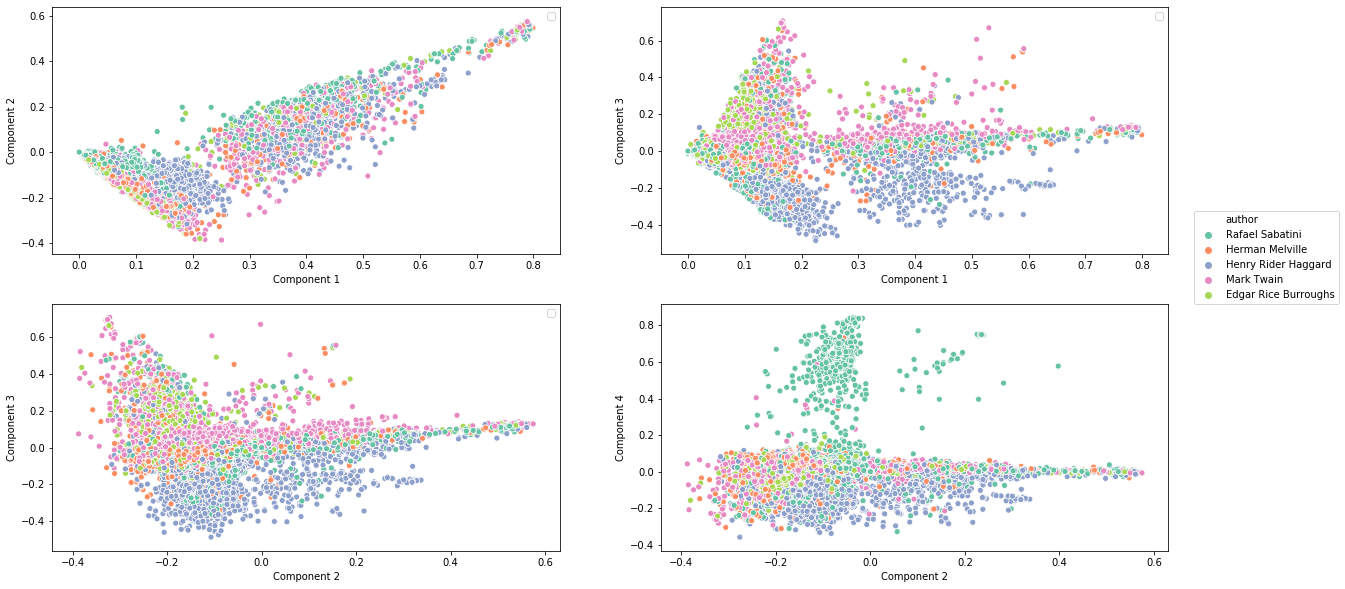

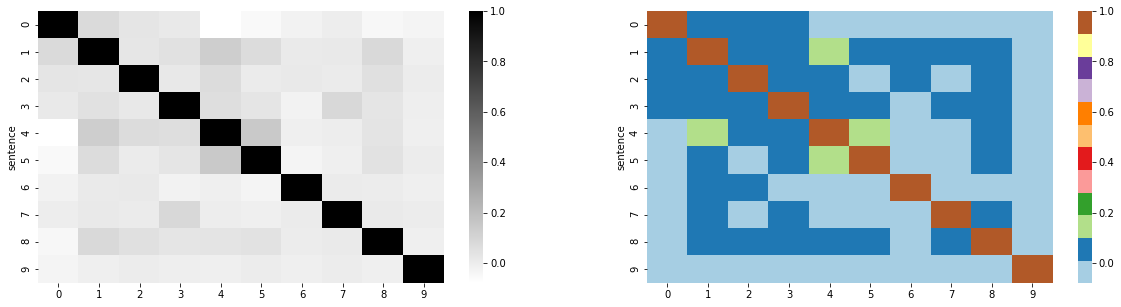

Key:
0 xxii
1 and besides all this, there was a certain lofty bearing about the pagan, which even his uncouthness could not altogether maim
2 as we read we seem to hear the voice of doom speaking continually
3 but still more curious was the fact of a lance-head of stone being found in him, not far from the buried iron, the flesh perfectly firm about it
4 the spirit of it i fought with whatever weapons were available, whenever and wherever i encountered it
5 the savage seemed to be sinking under the weight he bore
6 does you want to go en look at 'im yes
7 she flung herself at tom, crying, and says: oh, he dead, he dead, i know he dead! and tom he turned his head a little, and muttered something or other, which showed he warn't in his right mind; then she flung up her hands, and says: he alive, thank god! and that enough! and she snatched a kiss of him, and flew for the house to get the bed ready, and scattering orders right and left at the niggers and everybody else, as fast as her ton

In [19]:
#Our SVD data reducer. Features are reduced down to 200.
svd = TruncatedSVD(200, random_state=45)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
LSA = lsa.fit_transform(TfIdf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print(
    'The percentage of total variance in the dataset explained by each',
    'component from LSA.\n',
    variance_explained[:5]
)
print("Percent variance captured by all components:",total_variance*100)

# Compare the sklearn solution to ours 

plt.figure(figsize=(20,10))
for i, c in enumerate([(0,1), (0,2), (1,2), (1,3)]): 
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=LSA[:, c[0]], y=LSA[:, c[1]], hue=train['author'],
                    palette="Set2")
    plt.legend('')
    plt.xlabel('Component ' + str(c[0]+1))
    plt.ylabel('Component ' + str(c[1]+1))
plt.legend(loc = (1.05, 1))
plt.show()



# Compute document similarity using LSA component
similarity = cosine_similarity(LSA)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=train['sentence']).iloc[0:10,0:10]
#Making a plot
plt.figure(figsize=(20,5))
plt.subplot(121)
ax = sns.heatmap(sim_matrix,yticklabels=range(10), cmap='binary')
plt.subplot(122)
ax = sns.heatmap(sim_matrix,yticklabels=range(10), cmap='Paired')
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

In [21]:
# Transform test set 
test_tfidf = vectorizer.transform(test['sentence'])
LSA_test = lsa.transform(test_tfidf)

# model vars
x_train = LSA
x_test = LSA_test
y_train = train['author']
y_test = test['author']



## Supervised Learning

After using LSA, I decided to use it to set up my training and testing data and do some Supervised Learning. I tried, Logistic Regression and Random Forest in order to see how I could use the sentences along to predict the author. I created confusion matrix tables for both and decided that Logistic Regression was the best option. Although is had a lower training score (71 vs 79), the test scores (69 vs 59) of both made it a better option. From there I decided to look at the results of each book to see which had the best predictions. Of the authors, Logistic Regression had the most trouble with Herman Melville, and Henry Rider Haggard. It was odd that there was trouble with Haggard, in my opinion, due to how it plotted with LSA.


### Logistic Regression

In [30]:
lr = LogisticRegression(C=10000, n_jobs=2, multi_class='ovr',
                        solver='newton-cg',random_state=45)
lr.fit(x_train, y_train)
print('cross-validation:', cross_val_score(lr, x_train, y_train, cv=5).mean())
print('Accuracy of logistic regression on training set: {:.2f}'.format(lr.score(x_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'.format(lr.score(x_test, y_test)))
print('\n')
print('Test Crosstab Results:')
pd.crosstab(y_test, lr.predict(x_test))

cross-validation: 0.699381406934219
Accuracy of logistic regression on training set: 0.71
Accuracy of logistic regression on test set: 0.69


Test Crosstab Results:


col_0,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
author,,,,,
Edgar Rice Burroughs,863,102,207,105,311
Henry Rider Haggard,65,1545,179,106,328
Herman Melville,87,150,1670,125,397
Mark Twain,53,84,143,1418,275
Rafael Sabatini,95,261,333,151,2581


In [31]:
print('Training Crosstab Results:')
pd.crosstab(y_train, lr.predict(x_train))

Training Crosstab Results:


col_0,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
author,,,,,
Edgar Rice Burroughs,2150,226,402,218,677
Henry Rider Haggard,169,3507,446,232,762
Herman Melville,256,331,3955,319,948
Mark Twain,127,190,334,3444,665
Rafael Sabatini,225,467,579,317,6198


### Random Forest

In [20]:

rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10, 
                                      max_features='auto',random_state=45)
rfc.fit(x_train, y_train)

print('cross-validation:', cross_val_score(rfc, x_train, y_train, cv=5).mean())
print('Training set score: {:.2f}' .format(rfc.score(x_train, y_train)))
print('Test set score: {:.2f}' .format(rfc.score(x_test, y_test)))



cross-validation: 0.593501524787116
Training set score: 0.70
Test set score: 0.60


### Support Vector Machine 

In [23]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
svc_y_pred = svc.predict(x_test)

print('cross-validation:', cross_val_score(svc, x_train, y_train, cv=5).mean())
print('Training set score: {:.2f}' .format(svc.score(x_train, y_train)))
print('Test set score: {:.2f}' .format(svc.score(x_test, y_test)))
print('cross-validation:', cross_val_score(svc, x_train, y_train, cv=5).mean())

print('\n')
print('Test Crosstab Results:')
pd.crosstab(y_test, svc.predict(x_test))

cross-validation: 0.6833188441721659
Training set score: 0.70
Test set score: 0.68
cross-validation: 0.6833188441721659


Test Crosstab Results:


col_0,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
author,,,,,
Edgar Rice Burroughs,847,92,208,98,343
Henry Rider Haggard,67,1477,186,95,398
Herman Melville,99,137,1646,112,435
Mark Twain,46,87,169,1357,314
Rafael Sabatini,105,225,339,144,2608


## Unsupervised Learning Methods
Supervised learning revealed that maybe Haggard wasn’t grouped how I thought, or to the extent that I predicted before analysing it. However, maybe unsupervised learning would show me some grouping.  I decided to use 2, 5, and 10 for my initial clusters. The reason I used those are as follows. I used 2 for the number of books each author has, I used 5 for the actual number of authors, and 10 for the number of novels. The first concept that I tried was K-means. I saw some clusters, however when I completed the adjusted random index and silhouette coefficient the scores were both low. They were not negative (except 2 clusters) but they were low enough to make me think that the clustering weren’t that relevant. 



Next, I tried Agglomerative Clustering in hopes of better results. Agglomerative Clustering was less relevant and the majority of the random index scores were negative. They suggested 736 clusters, and in my opinion, I don't think that would show me anything of relevance. With that being said, I decided to try the learning methods that performed the “best” on the holdout group. 


### K-Means

In [23]:
# Split the data to test for consistent clustering
lsa1, lsa3= train_test_split(LSA, test_size=0.50, random_state=45)
lsa1, lsa2= train_test_split(LSA, test_size=0.50, random_state=45)
lsa3, lsa4= train_test_split(LSA, test_size=0.50, random_state=45)

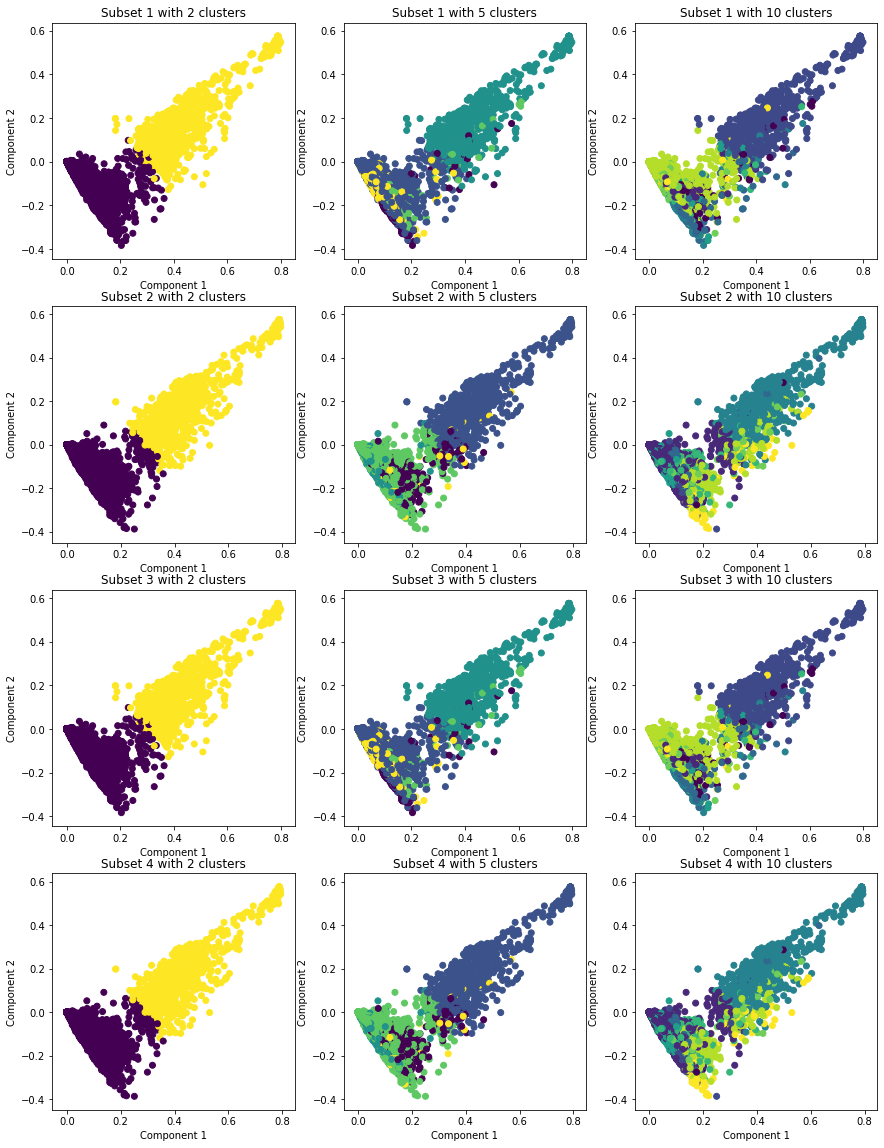

In [26]:


plt.figure(figsize=(20,20))
# Calculate predicted values.
preds = {}
models = {}
clusters = (2,5,10)

for row, data in enumerate([lsa1, lsa2, lsa3, lsa4, LSA]):
    
    # Generate cluster predictions and store them for clusters 2 to 10.
    for col, nclust in  enumerate(clusters):
        models[row, nclust] = KMeans(n_clusters=nclust, random_state=42).fit(data)
        preds[row, nclust] = models[row, nclust].predict(data)
        
        if row != 4:
            plt.subplot(4, 4, row*4 + (col+1))
            plt.scatter(data[:, 0], data[:, 1], c=preds[row, nclust])
            plt.title('Subset ' + str(row + 1) +' with ' + str(nclust) +' clusters')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
        

In [27]:
# Function to evaluate the clustering
def cluster_eval(clusters, preds, models, n):
    for i in clusters: 
        pred = preds[4,i]
        model = models[4,i]
        labels = model.labels_
        print('Adjusted Rand index for', i, 'clusters:', 
              round(metrics.adjusted_rand_score(train['author'], pred),5))
        print('Th`e silhouette coefficient for %d clusters: %.4f \n' % (i, metrics.silhouette_score(LSA, labels, metric='euclidean')))

    return(pd.crosstab(train['author'], preds[4,n]).T)

cluster_eval(clusters, preds, models, 5)

Adjusted Rand index for 2 clusters: 0.05435
Th`e silhouette coefficient for 2 clusters: 0.0113 

Adjusted Rand index for 5 clusters: 0.05314
Th`e silhouette coefficient for 5 clusters: 0.0210 

Adjusted Rand index for 10 clusters: 0.04139
Th`e silhouette coefficient for 10 clusters: 0.0343 



author,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
col_0,,,,,
0,102,478,141,330,420
1,265,310,540,231,307
2,1047,598,2697,411,1044
3,229,1236,293,175,588
4,2030,2494,2138,3613,5427


### Agglomerative clustering

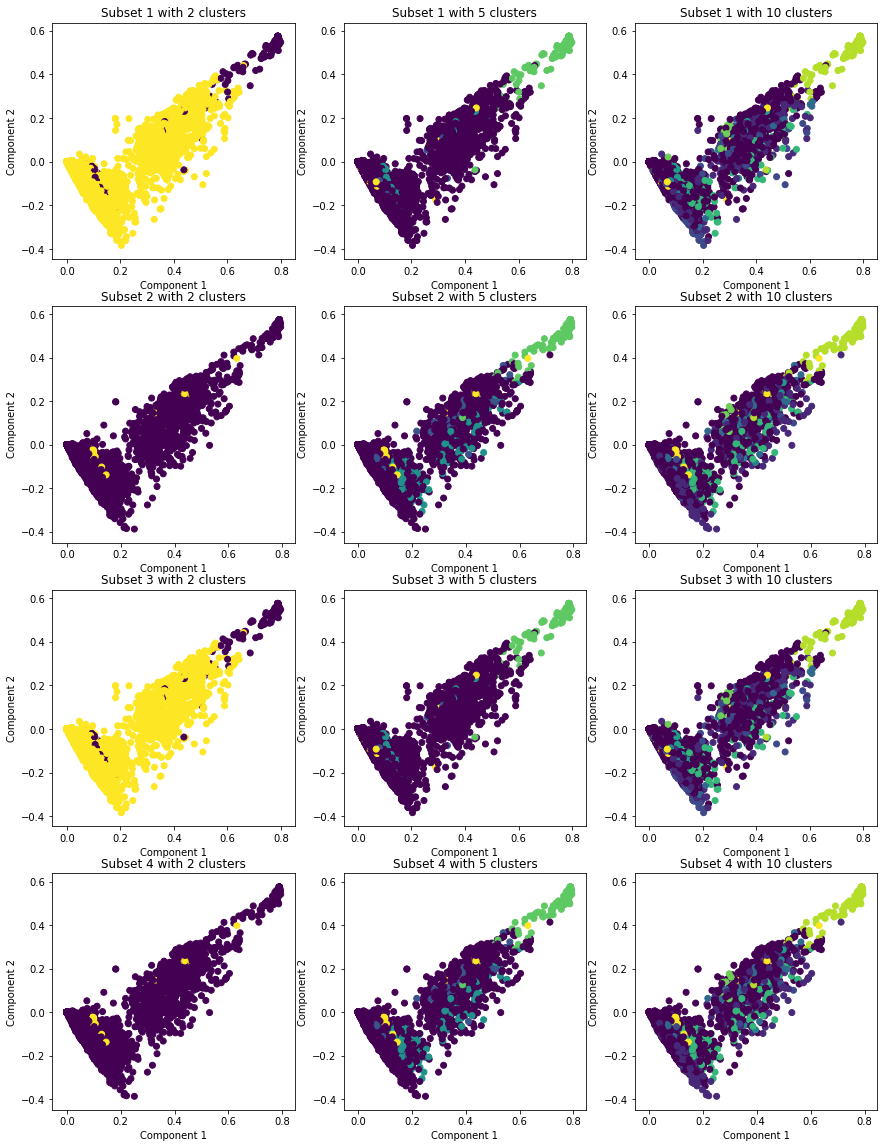

In [24]:
plt.figure(figsize=(20,20))
# Calculate predicted values.
preds_2 = {}
models_2 = {}
clusters = (2,5,10)
for row, data in enumerate([lsa1, lsa2, lsa3, lsa4, LSA]):
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for col, nclust in  enumerate(clusters):
        models_2[row, nclust] = AgglomerativeClustering(n_clusters=nclust).fit(data)
        preds_2[row, nclust] = AgglomerativeClustering(n_clusters=nclust).fit_predict(data)
        
        if row != 4:
            plt.subplot(4, 4, row*4 + (col+1))
            plt.scatter(data[:, 0], data[:, 1], c=preds_2[row, nclust])
            plt.title('Subset ' + str(row + 1) +' with ' + str(nclust) +' clusters')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
        
plt.show()

In [28]:

cluster_eval(clusters, preds_2, models_2, 5)

Adjusted Rand index for 2 clusters: -0.00422
Th`e silhouette coefficient for 2 clusters: 0.0158 

Adjusted Rand index for 5 clusters: -0.00815
Th`e silhouette coefficient for 5 clusters: 0.0103 

Adjusted Rand index for 10 clusters: 0.01367
Th`e silhouette coefficient for 10 clusters: 0.0112 



author,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
col_0,,,,,
0,3646,4775,5695,4718,6910
1,1,287,69,3,121
2,23,39,22,32,102
3,0,0,1,3,346
4,3,15,22,4,307


## Holdout Group(25%)
Logistic Regression was the best choice of the Supervised Learning methods that I used so I decided to perform the same method on the holdout group and compared it to the results above. The holdout group (70%) had almost the exact score as the test group(69%) from above. 

K-means was the best clustering method from above and 5 and 10 clusters gave me my most “relevant” results. Although  the clustering was more scattered, the silhouette scores for the holdout group were better than the regular group however it still was not that high. This leads me to believe that clustering may not be the best way to analyze these novels.


### Logistic Regression

In [32]:
holdout_tfidf = vectorizer.transform(holdout['sentence'])
LSA_holdout = lsa.transform(holdout_tfidf)

# model vars
x_holdout = LSA_holdout
y_holdout = holdout['author']

print('Holdout set score: {:.2f}' .format(lr.score(x_holdout, y_holdout)))
print('Test set score from earlier: {:.2f}' .format(lr.score(x_test, y_test)))
pd.crosstab(y_holdout, lr.predict(x_holdout))

Holdout set score: 0.70
Test set score from earlier: 0.69


col_0,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
author,,,,,
Edgar Rice Burroughs,969,116,205,98,299
Henry Rider Haggard,74,1731,219,109,314
Herman Melville,104,179,1856,169,440
Mark Twain,60,113,203,1595,273
Rafael Sabatini,115,261,347,165,2912


### K-Means

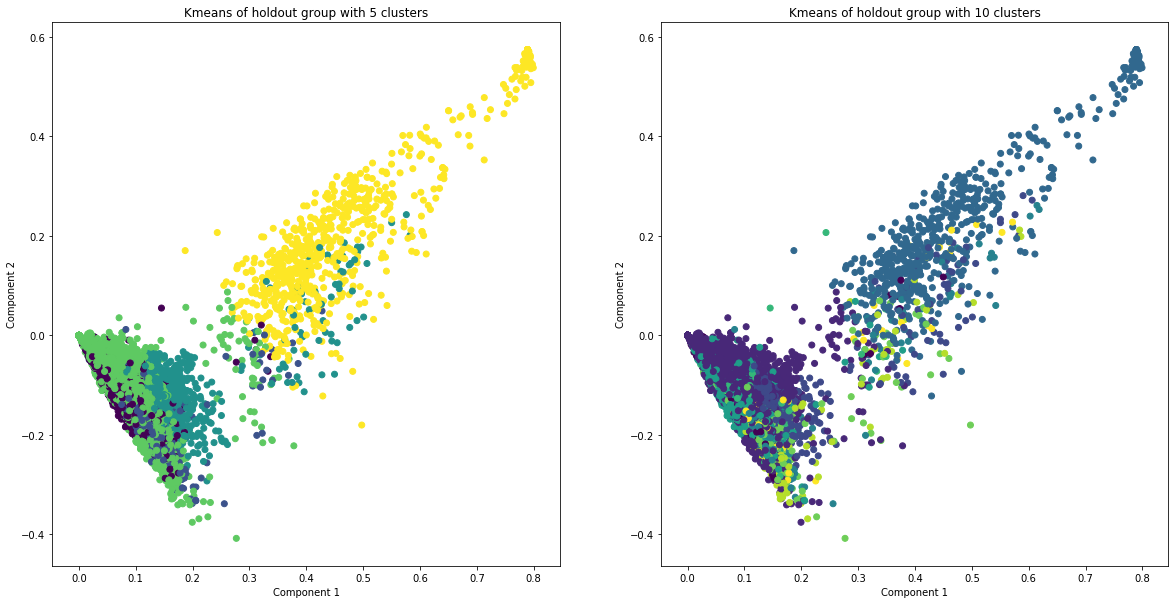

In [33]:
plt.figure(figsize=(20,10))

plt.subplot(121)
hpreds5 = KMeans(n_clusters=5, random_state=45).fit_predict(LSA_holdout)
plt.scatter(LSA_holdout[:, 0], LSA_holdout[:, 1], c=hpreds5)
plt.title('Kmeans of holdout group with 5 clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(122)
hpreds10 = KMeans(n_clusters=10, random_state=45).fit_predict(LSA_holdout)
plt.scatter(LSA_holdout[:, 0], LSA_holdout[:, 1], c=hpreds10)
plt.title('Kmeans of holdout group with 10 clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
        
plt.show()

In [34]:
print("Holdout Silhouette w 5 clusters: {:.4f}" .format(silhouette_score(x_holdout, hpreds5)))
print("\n")
print("Holdout Silhouette w 10 clusters: {:.4f}" .format(silhouette_score(x_holdout, hpreds10)))

Holdout Silhouette w 5 clusters: 0.0222


Holdout Silhouette w 10 clusters: 0.0361


### Initial Summary
Supervised learning gave me more accurate results but clustering was not as relevant as I predicted. I assume that other methods would be better for actually learning anything relevant about this set of novels. In further learning, I would like to research and perform other methods that would tell me more than I have learned from this capstone. 


## Further Investigation

In my opinion, Logistic Regression gave me the most understandable results and because of that, I decided to use those results for further investigation. For the most part, novels were grouped to the correct author. However, there were those that predicted a little more incorrectly/correctly than others and I thought that this would be a good result to investigate further. 

First I wanted look at authors who had the most incorrect predictions to belonging to another author. Looking at the testing crosstab, every author's incorrect prediction were the most in relation to Rafael Sabatini but Herman Melville had the most at 417.  Rafael Sabatini also had the most predictions closely related to Herman Melville so I decided to use both authors for my first set of comparisons. 

On the other side of things, I wanted to investigate the results of authors who were the least likely to be predicted as another author. All of the authors were least likely to be predicted as Edgar Rice Burroughs so I will use him as my first author. Of those authors, Mark Twain had the least incorrect predictions to Edgar Rice Burroughs. However, Edgar Rice Burroughs was least likely to be picked as Henry Rider Haggard. So for my least likely comparisons I want to first compare Edgar Rice Burroughs to Mark Twain and then compare him to Henry Rider Haggard.

For these comparisons I will be setting up separate dataframes for these authors, cleaning, and separating the text differently from above to investigate their words. 

<br>
*Note: Mark Twain and Henry Rider's comparisons are reversed below

## Similar Comparisons

### Rafael Sabatini vs Herman Melville

#### Dataframe Creation

In [35]:
#adding the novels of Rafael Sabatini and Herman Melville to a dictionary and then dataframe.
#Create dataframe for comparison. 
#text's authors are specific for text analysis

data2 = {'book' :["The Sea-Hawk", "Scaramouche: A Romance Of The French Revolution",
                  "Moby Dick", "A Romance Of The South Seas"],
         #I named the authors this way because it helped with word counting in later cells. 
         
            'novel':[seahawk, scar, moby, southsea]}
           
           

In [36]:
RSvsHM = pd.DataFrame(data2, columns= ['novel'], index=['Rafael Sabatini Sea-Hawk', 'Rafael Sabatini Scaramouche',
                     'Herman Melville Moby', 'Herman Melville Southsea'])
RSvsHM.head()

,novel
Rafael Sabatini Sea-Hawk,???THE SEA-HAWK\r\n\r\n\r\nBy Rafael Sabatini\...
Rafael Sabatini Scaramouche,???\r\nSCARAMOUCHE\r\n\r\nA ROMANCE OF THE FRE...
Herman Melville Moby,???[Moby Dick by Herman Melville 1851]\r\n\r\n...
Herman Melville Southsea,???A ROMANCE OF THE SOUTH SEAS\r\n\r\n\r\nBy H...


#### Data Cleaning

In [37]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    text = re.sub("project gutenberg", " ", text)
    text = re.sub("gutenberg", " ", text)
    text = re.sub("by",  " ", text)
 
    text = re.sub(r'--',' ',text)
    text = re.sub(r'_',' ',text)
    text = re.sub("[\[].*[\]]", "", text)
    
    #get rid of chapter titles
    text = re.sub(r'Chapter \d+','',text)
    text = re.sub(r'CHAPTER \d+', '', text)
    text = re.sub('CHAPTER', '', text)


    #get rid of \n line breaks
    text = re.sub("\\n\\n.*?\\n\\n", '', text)
    
   #get rid of extra spacing and a random set of characters I saw
    text = re.sub("  ", " ",text)
    text = re.sub('[ï»¿]', '',text)
   
    
    text = ' '.join(text.split())
    return text
round0= lambda x: text_cleaner(x)

In [38]:
# Let's take a look at the updated text
RSvsHM['novel'] = RSvsHM.novel.apply(round0)

RSvsHM.head()

,novel
Rafael Sabatini Sea-Hawk,???THE SEA-HAWK By Rafael Sabatini NOTE Lord H...
Rafael Sabatini Scaramouche,??? SCARAMOUCHE A ROMANCE OF THE FRENCH REVOLU...
Herman Melville Moby,??? ETYMOLOGY. (Supplied a Late Consumptive Us...
Herman Melville Southsea,???A ROMANCE OF THE SOUTH SEAS By Herman Melvi...


In [39]:
# Utility function for standard text cleaning.
def text_cleaner(text):


    #get rid of some punctuation and brackets
    text = re.sub("/.*? ", " ",text)
    text = re.sub("[\[].,*?[\]]", "", text)
    text = re.sub("\\./\\.", "",text)
    text = re.sub("``", "",text)
    text = re.sub("''", "",text)
    text = re.sub("  ", " ",text)
    text = re.sub("./", " ",text)
    
    #digits
   
   

    
    #get rid of extra spacing and a random set of characters I saw
    text = re.sub("  ", " ",text)
  
    text = re.sub("'s", " ",text)
    
    text = ' '.join(text.split())
    return text
round1= lambda x: text_cleaner(x)

In [40]:
# Let's take a look at the updated text
RSvsHM['novel'] = RSvsHM.novel.apply(round1)

RSvsHM.head(10)

,novel
Rafael Sabatini Sea-Hawk,???THE SEA-HAWK By Rafael Sabatini NOTE Lord H...
Rafael Sabatini Scaramouche,??? SCARAMOUCHE A ROMANCE OF THE FRENCH REVOLU...
Herman Melville Moby,??? ETYMOLOGY. (Supplied a Late Consumptive Us...
Herman Melville Southsea,???A ROMANCE OF THE SOUTH SEAS By Herman Melvi...


In [41]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    
    # get rid of all the XML markup
    text = re.sub('<.*?>','',text)
    
    #get rid of the "ENDOFARTICLE." text
    text = re.sub('ENDOFARTICLE.','',text)
    text = re.sub('\?','', text)
    text = re.sub('â', '', text)
    text = re.sub('0ing', '', text)
   
    text = re.sub('_', '', text)
    text = ' '.join(text.split())
    return text
round2= lambda x: text_cleaner(x)

In [42]:
# Let's take a look at the updated text
RSvsHM['novel'] =RSvsHM.novel.apply(round2)

RSvsHM.head(10)

,novel
Rafael Sabatini Sea-Hawk,THE SEA-HAWK By Rafael Sabatini NOTE Lord Henr...
Rafael Sabatini Scaramouche,SCARAMOUCHE A ROMANCE OF THE FRENCH REVOLUTION...
Herman Melville Moby,ETYMOLOGY. (Supplied a Late Consumptive Usher ...
Herman Melville Southsea,A ROMANCE OF THE SOUTH SEAS By Herman Melville...


In [43]:
#lowercase
RSvsHM['novel'] =RSvsHM['novel'].str.lower()

RSvsHM.head()

,novel
Rafael Sabatini Sea-Hawk,the sea-hawk by rafael sabatini note lord henr...
Rafael Sabatini Scaramouche,scaramouche a romance of the french revolution...
Herman Melville Moby,etymology. (supplied a late consumptive usher ...
Herman Melville Southsea,a romance of the south seas by herman melville...


### Count Vectorization

In [44]:
# We are going to create a document-term matrix using CountVectorizer
#Exclude common English stop words and other common words that may occur
cv = CountVectorizer(stop_words='english')
RSvsHM_cv = cv.fit_transform(RSvsHM.novel)
RSvsHM_dtm = pd.DataFrame(RSvsHM_cv.toarray(), columns=cv.get_feature_names())

In [45]:
#set index
RSvsHM_dtm.index= RSvsHM.index

RSvsHM_dtm.head()

,000,10,10th,13,139,140,144,1492,150,1595,...,zig,zodiac,zogranda,zone,zoned,zones,zoology,zoroaster,zowia,zur
Rafael Sabatini Sea-Hawk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Rafael Sabatini Scaramouche,0,0,2,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Herman Melville Moby,20,3,0,2,0,0,1,1,1,0,...,1,5,1,5,2,3,2,1,0,0
Herman Melville Southsea,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [46]:
RSvsHM_dtm = RSvsHM_dtm.transpose()
RSvsHM_dtm.head()

,Rafael Sabatini Sea-Hawk,Rafael Sabatini Scaramouche,Herman Melville Moby,Herman Melville Southsea
000,0,0,20,0
10,0,0,3,1
10th,0,2,0,0
13,0,3,2,0
139,0,0,0,1


In [47]:
# Find the top 300 words said by each author
RSHMwctop_dict = {}
for a in RSvsHM_dtm.columns:
    RSHMwctop = RSvsHM_dtm[a].sort_values(ascending=False).head(300)
    RSHMwctop_dict[a]= list(zip(RSHMwctop.index, RSHMwctop.values))

#top_dict

In [48]:
# Let's pull out the top  words for each author
RSHMwcwords = []
for author in RSvsHM_dtm.columns:
    RSHMwctop = [word for (word, count) in RSHMwctop_dict[author]]
    for t in  RSHMwctop:
        RSHMwcwords.append(t)


In [49]:
# If more than half(3) of the texts/authors(*) have it as a top word, exclude it from the list
#*I named the authors this way because it helped with word counting in later cells. 
         
rshmadd_stop_words = [word for word, count in Counter(RSHMwcwords).most_common() if count > 3]

# Add new stop words
rshmstop_words = text.ENGLISH_STOP_WORDS.union(rshmadd_stop_words)

### WordCloud Setup

In [50]:
#creating a new dataframe with RS and HM's texts combined

data2_1 = {'novel':[seahawk + scar, moby + southsea]}
           
RSHMwc= pd.DataFrame(data2_1, columns= ['novel'], index=['Rafael Sabatini',
                                                         'Herman Melville'])
RSHMwc.head()          

,novel
Rafael Sabatini,???THE SEA-HAWK\r\n\r\n\r\nBy Rafael Sabatini\...
Herman Melville,???[Moby Dick by Herman Melville 1851]\r\n\r\n...


In [51]:
#apply the same regex cleaning from above
# Let's take a look at the updated text
RSHMwc['novel'] = RSHMwc.novel.apply(round0)
RSHMwc['novel'] = RSHMwc.novel.apply(round1)
RSHMwc['novel'] = RSHMwc.novel.apply(round2)

RSHMwc['novel'] = RSHMwc['novel'].str.lower()

RSHMwc.head()

,novel
Rafael Sabatini,the sea-hawk by rafael sabatini note lord henr...
Herman Melville,[moby dick by herman melville 1851] etymology....


#### Rafael Sabatini

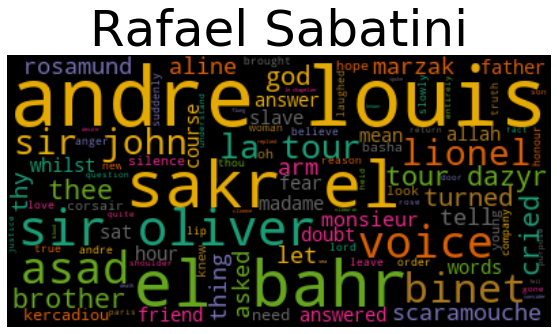

In [52]:
plt.rcParams['figure.figsize'] = [20, 5]

wc = WordCloud(stopwords=rshmstop_words, background_color="black", colormap="Dark2",
               max_words=100, max_font_size=140, random_state=42).generate(RSHMwc.novel[0])



    

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Rafael Sabatini', fontsize=50)
    
plt.show()


#### Herman Melville

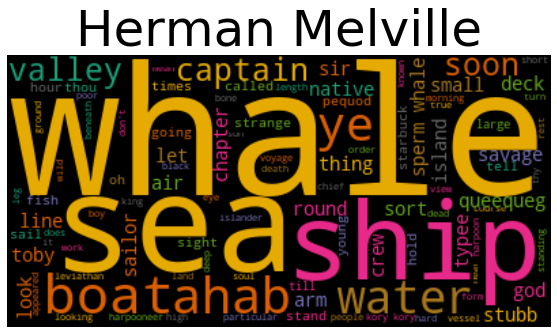

In [53]:
wc2 = WordCloud(stopwords=rshmstop_words, background_color="black", colormap="Dark2",
               max_words=100, max_font_size=140, random_state=42).generate(RSHMwc.novel[1])



    

plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.title('Herman Melville',fontsize=50)
    
plt.show()

#### Rafael Sabatini vs Herman Melville Results

Looking at the WordClouds below I can see some words that were similar among Rafael Sabatini and Herman Melville. Words such as "god", "sir", "let", "thing", and others still appeared in both texts after some cleaning, filtering, and exploring.


| Rafael Sabatini | Herman Melville |
| ------ | ----------- |
| <img src="RafaelSabatiniWC.png" width=400> | <img src="HermanMelvilleWC.png" width=400> |


## Least Similar Comparisons

### Edgar Rice Burroughs vs Henry Rider Haggard 

In [54]:
#Load the data/novels/text to a dictionary
#adding the novels of Rafael Sabatini and Herman Melville to a dictionary and then dataframe.
#Create dataframe for comparison. 
#text's authors are specific for text analysis
data3 = {'novel':[tarzan, pell,ivory, bright]}

ERBvsHRH = pd.DataFrame(data3, columns= ['novel'], 
                        index= ['Edgar Rice Burroughs Tarzan', 
                                'Edgar Rice Burroughs Pellucidar',
                                'Henry Rider Haggard Ivory', 
                                'Henry Rider Haggard Brighteyes'])
ERBvsHRH.head(10)     

,novel
Edgar Rice Burroughs Tarzan,???Tarzan the Terrible\r\n\r\n\r\nBy\r\n\r\nEd...
Edgar Rice Burroughs Pellucidar,"???The Project Gutenberg EBook of Pellucidar, ..."
Henry Rider Haggard Ivory,???THE IVORY CHILD\r\n\r\nby H. Rider Haggard\...
Henry Rider Haggard Brighteyes,???\r\nERIC BRIGHTEYES\r\n\r\nby H. Rider Hagg...


In [55]:
#apply the same regex cleaning from above
# Let's take a look at the updated text
ERBvsHRH['novel'] = ERBvsHRH.novel.apply(round0)
ERBvsHRH['novel'] = ERBvsHRH.novel.apply(round1)
ERBvsHRH['novel'] = ERBvsHRH.novel.apply(round2)

ERBvsHRH['novel'] =ERBvsHRH['novel'].str.lower()

ERBvsHRH.head(10)

,novel
Edgar Rice Burroughs Tarzan,tarzan the terrible by edgar rice burroughs ch...
Edgar Rice Burroughs Pellucidar,"the project gutenberg ebook of pellucidar, by ..."
Henry Rider Haggard Ivory,the ivory child by h. rider haggard chapter i ...
Henry Rider Haggard Brighteyes,eric brighteyes by h. rider haggard dedication...


### Count Vectorization

In [56]:
# We are going to create a document-term matrix using CountVectorizer
#Exclude common English stop words and other common words that may occur
ERBvsHRH_cv = cv.fit_transform(ERBvsHRH.novel)
ERBvsHRH_dtm = pd.DataFrame(ERBvsHRH_cv.toarray(), columns=cv.get_feature_names())

In [57]:
ERBvsHRH_dtm.index= ERBvsHRH.index

ERBvsHRH_dtm.head()

,000,10,100,101,107,10s,11,110,1100,117,...,zenith,zero,zest,zig,zigzag,zikali,zip,zulu,zululand,zulus
Edgar Rice Burroughs Tarzan,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,2,0,0,0,0,0
Edgar Rice Burroughs Pellucidar,2,1,0,1,1,0,1,1,0,1,...,1,1,1,1,0,0,1,0,0,0
Henry Rider Haggard Ivory,7,5,1,0,0,2,0,0,0,0,...,0,0,1,0,0,2,0,14,13,5
Henry Rider Haggard Brighteyes,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
ERBvsHRH_dtm = ERBvsHRH_dtm.transpose()
ERBvsHRH_dtm.head()

,Edgar Rice Burroughs Tarzan,Edgar Rice Burroughs Pellucidar,Henry Rider Haggard Ivory,Henry Rider Haggard Brighteyes
000,0,2,7,0
10,1,1,5,0
100,0,0,1,0
101,0,1,0,0
107,0,1,0,0


### Text Exploration

In [59]:
# Find the top 300 words said by each author
erbhrhtop_dict = {}
for b in ERBvsHRH_dtm.columns:
    erbhrhtop = ERBvsHRH_dtm[b].sort_values(ascending=False).head(300)
    erbhrhtop_dict[b]= list(zip(erbhrhtop.index, erbhrhtop.values))


In [60]:
# Let's first pull out the top  words for each author
erbhrhwords = []
for author in ERBvsHRH_dtm.columns:
    erbhrhtop = [word for (word, count) in erbhrhtop_dict[author]]
    for u in erbhrhtop:
        erbhrhwords.append(u)


In [61]:
# If more than half of the texts have it as a top word, exclude it from the list
erbhrhadd_stop_words = [word for word, 
                        count in Counter(erbhrhwords).most_common() if count > 3]

# Add new stop words
erbhrhstop_words = text.ENGLISH_STOP_WORDS.union(erbhrhadd_stop_words)

In [62]:
#creating a new dataframe with ERV and HRH's texts combined

data3_1 = {'novel':[tarzan +  pell, ivory + bright]}
      
           
erbhrhwc= pd.DataFrame(data3_1, columns= ['novel'], index=['Edgar Rice Burroughs',
                                                         'Henry Rider Haggard'])
erbhrhwc.head()      

,novel
Edgar Rice Burroughs,???Tarzan the Terrible\r\n\r\n\r\nBy\r\n\r\nEd...
Henry Rider Haggard,???THE IVORY CHILD\r\n\r\nby H. Rider Haggard\...


In [63]:
#apply the same regex cleaning from above
# Let's take a look at the updated text
erbhrhwc['novel'] = erbhrhwc.novel.apply(round0)
erbhrhwc['novel'] = erbhrhwc.novel.apply(round1)
erbhrhwc['novel'] = erbhrhwc.novel.apply(round2)

erbhrhwc['novel'] = erbhrhwc['novel'].str.lower()

erbhrhwc.head()

,novel
Edgar Rice Burroughs,tarzan the terrible by edgar rice burroughs ch...
Henry Rider Haggard,the ivory child by h. rider haggard chapter i ...


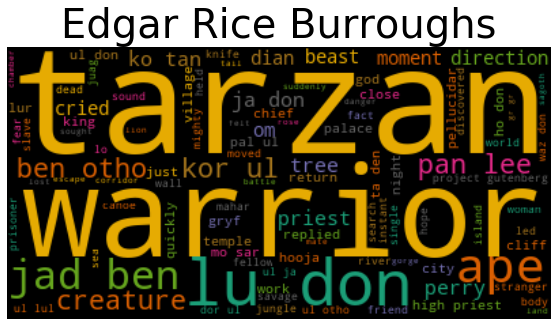

In [64]:
#Edgar Rice Burroughs WordCloud
plt.rcParams['figure.figsize'] = [20, 5]

wc3 = WordCloud(stopwords=erbhrhstop_words, background_color="black", colormap="Dark2",
               max_words=100, max_font_size=140, random_state=42).generate(erbhrhwc.novel[0])



    

plt.imshow(wc3, interpolation="bilinear")
plt.axis("off")
plt.title('Edgar Rice Burroughs',fontsize=40)
    
plt.show()


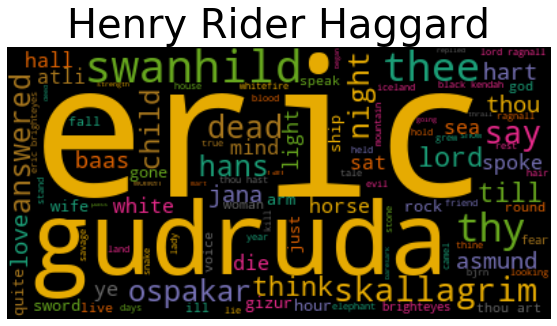

In [65]:
#Henry Rider Haggard WordCloud
plt.rcParams['figure.figsize'] = [20, 5]

wc4 = WordCloud(stopwords=erbhrhstop_words, background_color="black", colormap="Dark2",
               max_words=100, max_font_size=140, random_state=42).generate(erbhrhwc.novel[1])



    

plt.imshow(wc4, interpolation="bilinear")
plt.axis("off")
plt.title('Henry Rider Haggard',fontsize=40)
    
plt.show()


#### Edgar Rice Burroughs vs Henry Rider Haggard Results
Looking at these two I saw very few to no similarities which explains why it was one of the least likely to be matched to the other.

| Edgar Rice Burroughs | Henry Rider Haggard |
| ------ | ----------- |
| <img src="EdgarRiceBurroughsWC.png" width=400> | <img src="HenryRiderHaggardWC.png" width=400> |

### Edgar Rice Burroughs vs Mark Twain

In [66]:
#Create dataframe for comparison. 
#text's authors are specific for text analysis
data4= {'novel':[tarzan, pell, huck, saw]}
ERBvsMT =pd.DataFrame(data4, index= ['Edgar Rice Burroughs Tarzan', 
                                     'Edgar Rice Burroughs Pell',
                                     'Mark Twain Huck', 'Mark Twain Sawyer'],
                      columns= ['novel'])
ERBvsMT.head()

,novel
Edgar Rice Burroughs Tarzan,???Tarzan the Terrible\r\n\r\n\r\nBy\r\n\r\nEd...
Edgar Rice Burroughs Pell,"???The Project Gutenberg EBook of Pellucidar, ..."
Mark Twain Huck,???ADVENTURES\r\n\r\nOF\r\n\r\nHUCKLEBERRY FIN...
Mark Twain Sawyer,???THE ADVENTURES OF TOM SAWYER\r\n\r\nBy Mark...


In [67]:
#apply the same regex cleaning from above
# Let's take a look at the updated text
ERBvsMT['novel'] = ERBvsMT.novel.apply(round0)
ERBvsMT['novel'] = ERBvsMT.novel.apply(round1)
ERBvsMT['novel'] = ERBvsMT.novel.apply(round2)

ERBvsMT['novel'] =ERBvsMT['novel'].str.lower()

ERBvsMT.head()

,novel
Edgar Rice Burroughs Tarzan,tarzan the terrible by edgar rice burroughs ch...
Edgar Rice Burroughs Pell,"the project gutenberg ebook of pellucidar, by ..."
Mark Twain Huck,adventures of huckleberry finn (tom sawyer's c...
Mark Twain Sawyer,the adventures of tom sawyer by mark twain (sa...


### Count Vectorization

In [68]:
# We are going to create a document-term matrix using CountVectorizer
#Exclude common English stop words and other common words that may occur

ERBvsMT_cv = cv.fit_transform(ERBvsMT.novel)
ERBvsMT_dtm = pd.DataFrame(ERBvsMT_cv.toarray(), columns=cv.get_feature_names())

In [69]:
ERBvsMT_dtm.index= ERBvsMT.index

ERBvsMT_dtm.head()

,000,10,101,107,11,110,117,119,12,124,...,zag,zeal,zebras,zenith,zephyr,zero,zest,zig,zigzag,zip
Edgar Rice Burroughs Tarzan,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,2,0
Edgar Rice Burroughs Pell,2,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,1,1,0,1
Mark Twain Huck,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Mark Twain Sawyer,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0


In [70]:
ERBvsMT_dtm = ERBvsMT_dtm.transpose()
ERBvsMT_dtm.head()

,Edgar Rice Burroughs Tarzan,Edgar Rice Burroughs Pell,Mark Twain Huck,Mark Twain Sawyer
000,0,2,1,0
10,1,1,1,0
101,0,1,0,0
107,0,1,0,0
11,1,1,0,0


### Text Exploration

In [71]:
# Find the top 30 words said by each author
ERBvsMTtop_dict = {}
for c in ERBvsMT_dtm.columns:
    ERBvsMTtop = ERBvsMT_dtm[c].sort_values(ascending=False).head(30)
    ERBvsMTtop_dict[c]= list(zip(ERBvsMTtop.index, ERBvsMTtop.values))

In [72]:
# Let's first pull out the top  words for each author
ERBvsMTwords = []
for author in ERBvsMT_dtm.columns:
    ERBvsMTtop = [word for (word, count) in ERBvsMTtop_dict[author]]
    for t in ERBvsMTtop:
        ERBvsMTwords.append(t)


In [73]:
# If more than half of the authors have it as a top word, exclude it from the list
ERBvsMTadd_stop_words = [word for word, count in Counter(ERBvsMTwords).most_common() if count > 3]

# Add new stop words
ERBvsMTstop_words = text.ENGLISH_STOP_WORDS.union(ERBvsMTadd_stop_words)

### WordCloud Setup

In [74]:
#setup up specific dataframe for wordcloud
#combining texts to get the overall word picture for each
data4_1= {'novel':[tarzan + pell, huck + saw]}
ERBMTwc =pd.DataFrame(data4_1, index= ['Edgar Rice Burroughs', 'Mark Twain'],
                      columns= ['novel'])
ERBMTwc.head()

,novel
Edgar Rice Burroughs,???Tarzan the Terrible\r\n\r\n\r\nBy\r\n\r\nEd...
Mark Twain,???ADVENTURES\r\n\r\nOF\r\n\r\nHUCKLEBERRY FIN...


In [75]:
#apply the same regex cleaning from above
# Let's take a look at the updated text
ERBMTwc['novel'] = ERBMTwc.novel.apply(round0)
ERBMTwc['novel'] = ERBMTwc.novel.apply(round1)
ERBMTwc['novel'] = ERBMTwc.novel.apply(round2)

ERBMTwc['novel'] = ERBMTwc['novel'].str.lower()

ERBMTwc.head()

,novel
Edgar Rice Burroughs,tarzan the terrible by edgar rice burroughs ch...
Mark Twain,adventures of huckleberry finn (tom sawyer's c...


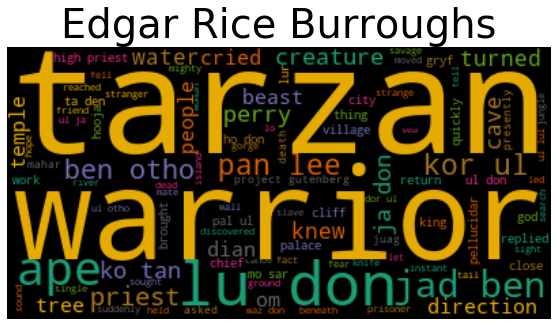

In [76]:
plt.rcParams['figure.figsize'] = [20, 5]

wc5 = WordCloud(stopwords=rshmstop_words, background_color="black", colormap="Dark2",
               max_words=100, max_font_size=140,
                random_state=42).generate(ERBMTwc.novel[0])



    

plt.imshow(wc5, interpolation="bilinear")
plt.axis("off")
plt.title('Edgar Rice Burroughs', fontsize=40)
    
plt.show()


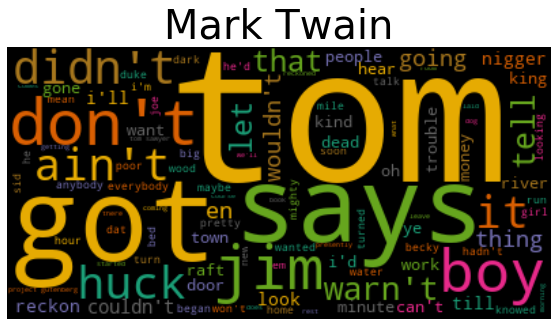

In [77]:

#RSvsHM=clean
#RSvsHM_dtm=data?
# authors = ['RS','HM']
plt.rcParams['figure.figsize'] = [20, 5]

wc6 = WordCloud(stopwords=rshmstop_words, background_color="black", colormap="Dark2",
               max_words=100, max_font_size=140, 
                random_state=42).generate(ERBMTwc.novel[1])



    

plt.imshow(wc6, interpolation="bilinear")
plt.axis("off")
plt.title('Mark Twain', fontsize=40)
    
plt.show()


#### Edgar Rice Burroughs vs Mark Twain Results
Looking at these two I saw very few to no similarities which explains why it was one of the least likely to be matched to the other.

| Edgar Rice Burroughs | Mark Twain |
| ------ | ----------- |
| <img src="EdgarRiceBurroughs2WC.png" width=400> | <img src="MarkTwainWC.png" width=400> |

As expected, there were not noticeable similarities among common words. This explains why they were the leasst likely to be incorrectly matched to each other. 